# Note
the used func_support file that has been used in this code is attached in the appendix chapter

# Task1
Generating dataset

In [4]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
import sklearn.linear_model
from scipy.spatial.distance import pdist, cdist, squareform
from func_support import plot_decision_boundary, mixt_model

%matplotlib inline
colors = sns.color_palette()

In [30]:
# Generating Data
## class 1 and class 2 parameters:
N1 = np.array([50, 50])
N2 = np.array([50, 50, 50])
Mu1 = np.array([[-5, 5],[5, -5]]).T                            # w1 mean 
Mu2 = np.array([[-5, -5], [0, 0], [5, 5]]).T                   # w2 mean
S1 = np.array([[[2,0],[0,2]],[[2,0],[0,2]]])                            # w1 Covariance
S2 = np.array([[[2,0],[0,2]],[[2,0],[0,2]],[[2,0],[0,2]]])             # w2 Covariance 


## Training set X1 :
Xtr1 = mixt_model(Mu1, S1, N1, 0)      # Training dataset for w1
Ytr1 = 1*np.ones((100, 1))               # Labels for w1

Xtr0 = mixt_model(Mu2, S2, N2, 0)       # Training dataset for w0
Ytr0 = 0*np.ones((150, 1))               # Labels for w0

# collecting in a single set for data and labels
X1 = np.concatenate((Xtr1, Xtr0), axis = 1)
Y1 = np.concatenate((Ytr1, Ytr0), axis = 0).T

## Test set X2 :
Xte1 = mixt_model(Mu1, S1, N1, 1)       # Test dataset for w1
Yte1 = 1*np.ones((100, 1))               # Labels for w1

Xte0 = mixt_model(Mu2, S2, N2, 1)      # Test dataset for w0
Yte0 = 0*np.ones((150, 1))               # Labels for w0

# collecting in a single set for data and labels
X2 = np.concatenate((Xte1, Xte0), axis = 1)
Y2 = np.concatenate((Yte1, Yte0), axis = 0).T



Text(0.5, 1.0, 'Training dataset for w1 and w2')

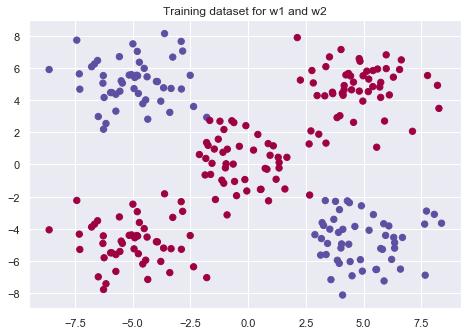

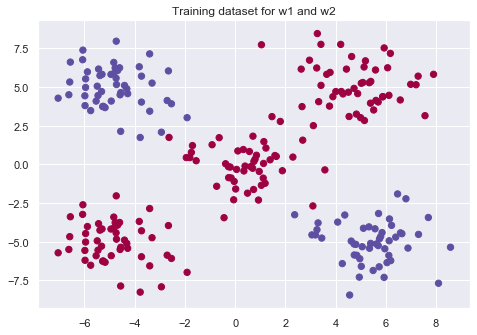

In [25]:
# Plotting: 
fig = plt.figure()
ax  = fig.add_axes([0.2, 0.2, 1, 1])
plt.scatter(X1[0], X1[1], c = Y1.ravel(), s=40, cmap=plt.cm.Spectral)
ax.set_title("Training dataset for w1 and w2")

fig = plt.figure()
ax  = fig.add_axes([0.2, 0.2, 1, 1])
plt.scatter(X2[0], X2[1], c = Y2.ravel(), s=40, cmap=plt.cm.Spectral)
ax.set_title("Training dataset for w1 and w2")


# Task2
Neural Network Implementation

In [31]:
# Creating the neural network
def nn_model(X, Y, n_h , num_iterations  , learning_rate  , print_cost = False):
    np.random.seed(3)
    
## NN definition
    n_x = X.shape[0]       # size of the input layer
    n_h = n_h              # Size of the hidden layer
    n_y = Y.shape[0]       # size of output layer
    
## parameter initialization

    # the defined NN contains 4 paramters (w1,w2,w3,w4) 
    w1 = np.random.randn(n_h, n_x)*0.01
    w2 = np.random.randn(n_y, n_h)*0.01


    
    ## Gradient Descent Loop
        
    for i in range(0, num_iterations):
        # Forward Propagation
        # Hidden node
        #A1 = np.dot(w1.T,X.T)
        A1 = np.dot(w1,X)
        Z1 = np.tanh(A1)                   # Output of Hidden nodes
        

        # Output Node
        A2 = np.dot(w2, Z1) 
        Z2 = 1./(1+np.exp(-A2))               # output layer's signmoid function        
        

        # Cost calculation 
        m = Y.shape[1]
        logprob = np.multiply(np.log(Z2),Y)+ np.multiply(np.log(1-Z2),1-Y)
        cost = - np.sum(logprob)/m
        
        # Perform Back propagation
        #dErr1 = Z2[:,0] - Y.T              # Out_error =0.5(Output - target)^2 
        #dErr2 = Z2[:,1] - Y.T
        #dErr  = np.concatenate((dErr1,dErr2), axis=0).reshape(250,2)
        dErr = Z2 - Y
        dw2  = (np.matmul(dErr,Z1.T)/m)
        dA1  = np.multiply(np.matmul(w2.T,dErr),(1-np.power(Z1, 2)))
        dw1  = (np.matmul(dA1, X.T)/m)


        
        # Parameter update
        w1 = w1-learning_rate*dw1
        w2 = w2-learning_rate*dw2

        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        
        parameters = {"W1": w1, "W2": w2}
    return parameters  


In [65]:
Parameters1 = nn_model(X1, Y1, 2 , num_iterations = 10000 , learning_rate = 0.5 , print_cost = False) # NN with training set
Parameters2 = nn_model(X2, Y2, 2 , num_iterations = 10000 , learning_rate = 0.5 , print_cost = False) # NN with test set

# Comment
for the training dataset: the optimum values can be achieved at around 2000 iteration , where the cost is at its lowest (0.688478)

In [66]:
def nn_predict(parameters, X):
    
    """
    Arguments:
    parameters -- python dictionary containing trained parameters
    X -- input data of size (n_x, m)
    
    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # unpack the parameters
    W1 = parameters["W1"]

    W2 = parameters["W2"]

    
    # Forward propagation
    A1 = np.dot(W1,X)  
    Z1 = np.tanh(A1)
    A2 = np.dot(W2,Z1) 
    Z2 = 1./(1+np.exp(-A2))      #  output latyer's sigmoid transfer function
    
    predictions = np.around(Z2)
    
    return predictions

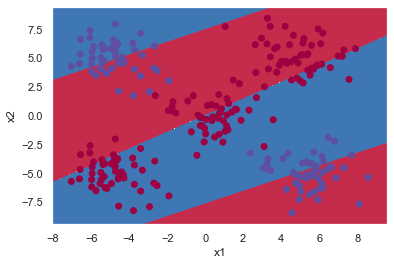

In [67]:
# Plotting the test set with the decision boundary
plot_decision_boundary(lambda x: nn_predict(Parameters1, x.T), X2, Y2.ravel())

In [68]:
 #Print accuracy
predictions1 = nn_predict(Parameters1, X1)
print ('training data Accuracy: %d' % float((np.dot(Y1,predictions1.T) + np.dot(1-Y1,1-predictions1.T))/float(Y1.size)*100) + '%')
predictions2 = nn_predict(Parameters2, X2)
print ('test data Accuracy: %d' % float((np.dot(Y2,predictions2.T) + np.dot(1-Y2,1-predictions2.T))/float(Y2.size)*100) + '%')

training data Accuracy: 54%
test data Accuracy: 52%


# Task 3
Implementing Nueral Network with step size 0.001

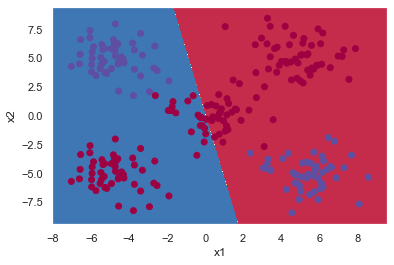

In [62]:
Parameters3 = nn_model(X1, Y1, 2 , num_iterations = 10000 , learning_rate = 0.001 , print_cost = False) # NN with training set
Parameters4 = nn_model(X2, Y2, 2 , num_iterations = 10000 , learning_rate = 0.001 , print_cost = False) # NN with test set

# Plotting the test set with the decision boundary

plot_decision_boundary(lambda x: nn_predict(Parameters4, x.T), X2, Y2.ravel())

In [64]:
 #Print accuracy
predictions1 = nn_predict(Parameters3, X1)
print ('training data Accuracy: %d' % float((np.dot(Y1,predictions1.T) + np.dot(1-Y1,1-predictions1.T))/float(Y1.size)*100) + '%')
predictions2 = nn_predict(Parameters4, X2)
print ('test data Accuracy: %d' % float((np.dot(Y2,predictions2.T) + np.dot(1-Y2,1-predictions2.T))/float(Y2.size)*100) + '%')

training data Accuracy: 48%
test data Accuracy: 52%


# Comment
Decreasing the step size wll make the algorithm moves towards the optimum values in a slow manner, consequently; the number of iterations should be increased.

# Task 4
Implementing Nueral Network with different hidden layer's sizes  (K=1 , K=4, K=20)

training data Accuracy: 51%
training data Accuracy: 50%
training data Accuracy: 52%


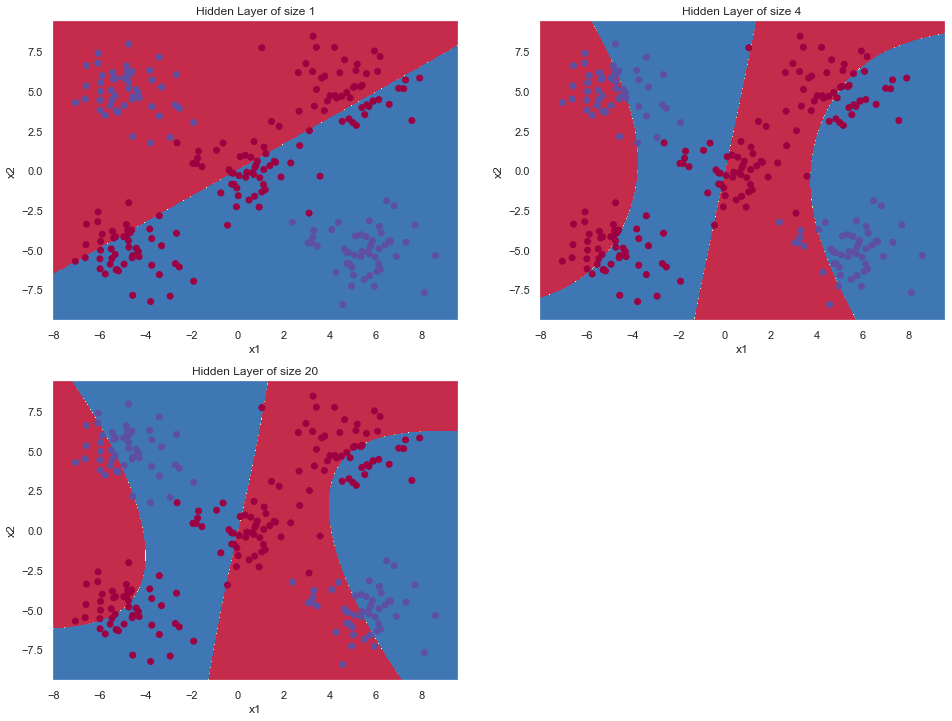

In [69]:
# Training set

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 4, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X2, Y2, n_h, num_iterations = 10000)
    plot_decision_boundary(lambda x: nn_predict(parameters, x.T), X2, Y2.ravel())
     #Print accuracy
    predictions1 = nn_predict(parameters, X1)
    print ('training data Accuracy: %d' % float((np.dot(Y2,predictions1.T) + np.dot(1-Y2,1-predictions1.T))/float(Y2.size)*100) + '%')


# Comment
first of all increasing the number of nodes in the hidden layer is at the expense of the training time, on the other hand it increases the classification accuracy